# Credit Card Fraud Detection

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# credit_data <- read_csv(".\\input\\creditcard.csv")
credit_data <- read_csv("./input/creditcard.csv")

Rows: 284807 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (31): Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Exploration

In [3]:
dim(credit_data)

[1] 284807     31

In [4]:
head(credit_data, n=10)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-1.3598071,-0.07278117,2.53634674,1.3781552,-0.33832077,0.46238778,0.239598554,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
0,1.1918571,0.26615071,0.16648011,0.4481541,0.06001765,-0.08236081,-0.078802983,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
1,-1.3583541,-1.34016307,1.77320934,0.3797796,-0.50319813,1.80049938,0.791460956,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
1,-0.9662717,-0.18522601,1.79299334,-0.8632913,-0.01030888,1.24720317,0.237608940,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
2,-1.1582331,0.87773675,1.54871785,0.4030339,-0.40719338,0.09592146,0.592940745,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,69.99,0
2,-0.4259659,0.96052304,1.14110934,-0.1682521,0.42098688,-0.02972755,0.476200949,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
4,1.2296576,0.14100351,0.04537077,1.2026127,0.19188099,0.27270812,-0.005159003,0.08121294,0.4649600,⋯,-0.167716266,-0.270709726,-0.15410379,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
7,-0.6442694,1.41796355,1.07438038,-0.4921990,0.94893409,0.42811846,1.120631358,-3.80786424,0.6153747,⋯,1.943465340,-1.015454710,0.05750353,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
7,-0.8942861,0.28615720,-0.11319221,-0.2715261,2.66959866,3.72181806,0.370145128,0.85108444,-0.3920476,⋯,-0.073425100,-0.268091632,-0.20423267,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0


In [5]:
table(credit_data$Class)


     0      1 
284315    492 

- dealing with unbalanced data

In [6]:
summary(credit_data$Class)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.001728 0.000000 1.000000 

In [7]:
summary(credit_data$Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.60    22.00    88.35    77.17 25691.16 

In [8]:
var(credit_data$Amount)

[1] 62560.07

In [9]:
sd(credit_data$Amount)

[1] 250.1201

## Data Manipulation

### Standardize `Amount`

In [10]:
credit_data$Amount <- scale(credit_data$Amount)
credit_data <- credit_data %>% select(-Time)
head(credit_data, n=10)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>
-1.3598071,-0.07278117,2.53634674,1.3781552,-0.33832077,0.46238778,0.239598554,0.09869790,0.3637870,0.09079417,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,0.24496383,0
1.1918571,0.26615071,0.16648011,0.4481541,0.06001765,-0.08236081,-0.078802983,0.08510165,-0.2554251,-0.16697441,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,-0.34247394,0
-1.3583541,-1.34016307,1.77320934,0.3797796,-0.50319813,1.80049938,0.791460956,0.24767579,-1.5146543,0.20764287,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,1.16068389,0
-0.9662717,-0.18522601,1.79299334,-0.8632913,-0.01030888,1.24720317,0.237608940,0.37743587,-1.3870241,-0.05495192,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,0.14053401,0
-1.1582331,0.87773675,1.54871785,0.4030339,-0.40719338,0.09592146,0.592940745,-0.27053268,0.8177393,0.75307443,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,-0.07340321,0
-0.4259659,0.96052304,1.14110934,-0.1682521,0.42098688,-0.02972755,0.476200949,0.26031433,-0.5686714,-0.37140720,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,-0.33855582,0
1.2296576,0.14100351,0.04537077,1.2026127,0.19188099,0.27270812,-0.005159003,0.08121294,0.4649600,-0.09925432,⋯,-0.167716266,-0.270709726,-0.15410379,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,-0.33327836,0
-0.6442694,1.41796355,1.07438038,-0.4921990,0.94893409,0.42811846,1.120631358,-3.80786424,0.6153747,1.24937618,⋯,1.943465340,-1.015454710,0.05750353,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,-0.19010714,0
-0.8942861,0.28615720,-0.11319221,-0.2715261,2.66959866,3.72181806,0.370145128,0.85108444,-0.3920476,-0.41043043,⋯,-0.073425100,-0.268091632,-0.20423267,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,0.01939221,0


## Data Modeling
### Split the dataset into training and testing set

In [11]:
# set.seed(123)
# data_sample <- sample.split(credit_data$Class, SplitRatio=0.80)
# train_data <- subset(credit_data, data_sample==TRUE)
# test_data <- subset(credit_data, data_sample==FALSE)
credit_data <- credit_data %>%
    mutate(fold = sample(head(rep(1:5, (dim(credit_data)[1] %/% 5) + 1), dim(credit_data)[1])))

train_data <- credit_data %>%
    filter(fold != 5) %>%
    select(-fold)
test_data <- credit_data %>%
    filter(fold == 5) %>%
    select(-fold)
print(dim(train_data))
print('==========')
print(dim(test_data))

[1] 227846     30
[1] "=========="
[1] 56961    30


### Logistic Regression

In [12]:
logistic_model <- glm(Class~., train_data, family=binomial())
summary(logistic_model)


Call:
glm(formula = Class ~ ., family = binomial(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6180  -0.0287  -0.0196  -0.0131   4.5722  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.604162   0.156544 -54.963  < 2e-16 ***
V1           0.077582   0.046932   1.653 0.098317 .  
V2           0.004762   0.067142   0.071 0.943457    
V3           0.011442   0.053780   0.213 0.831520    
V4           0.646222   0.076670   8.429  < 2e-16 ***
V5           0.082252   0.076592   1.074 0.282866    
V6          -0.154939   0.091455  -1.694 0.090234 .  
V7          -0.099482   0.077473  -1.284 0.199115    
V8          -0.184514   0.036925  -4.997 5.82e-07 ***
V9          -0.285144   0.116307  -2.452 0.014220 *  
V10         -0.654216   0.103850  -6.300 2.98e-10 ***
V11         -0.036398   0.085402  -0.426 0.669965    
V12          0.054702   0.095369   0.574 0.566252    
V13         -0.321352   0.092438  -3.476 0.

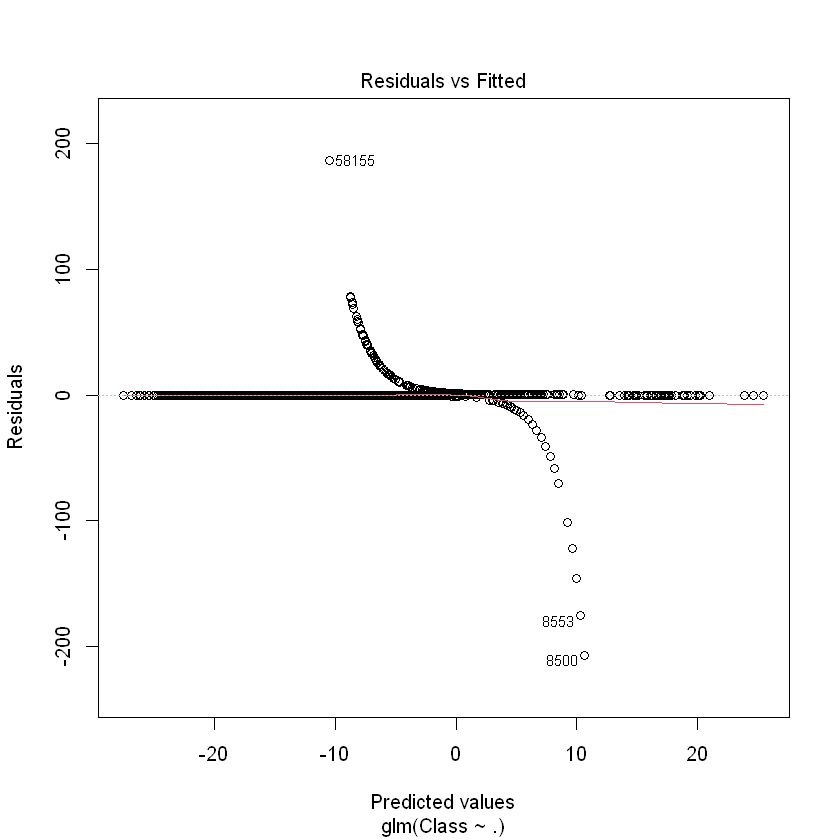

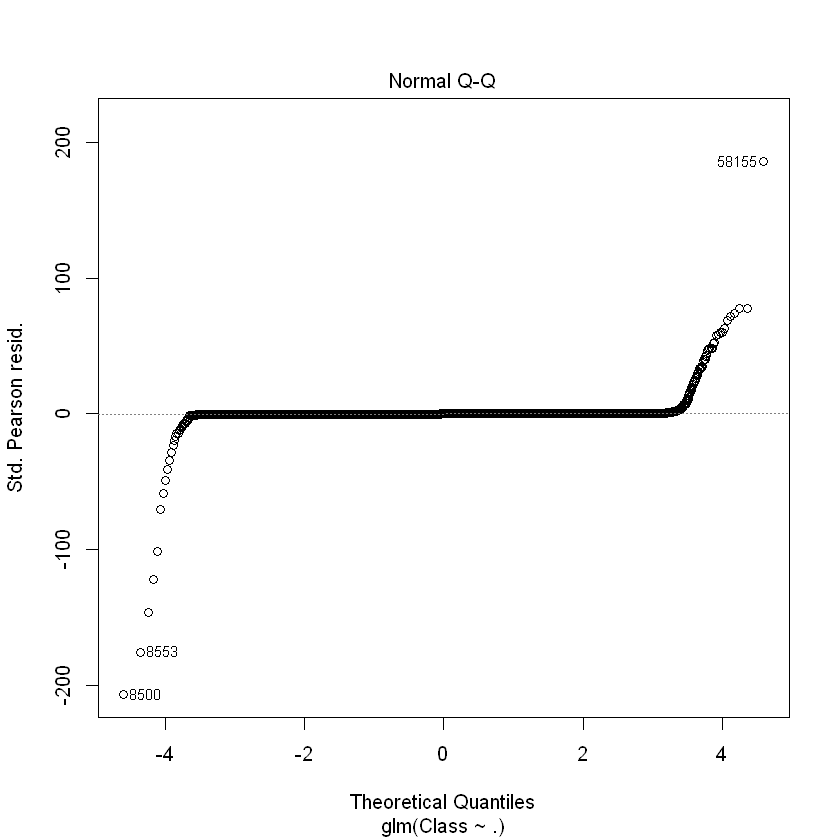

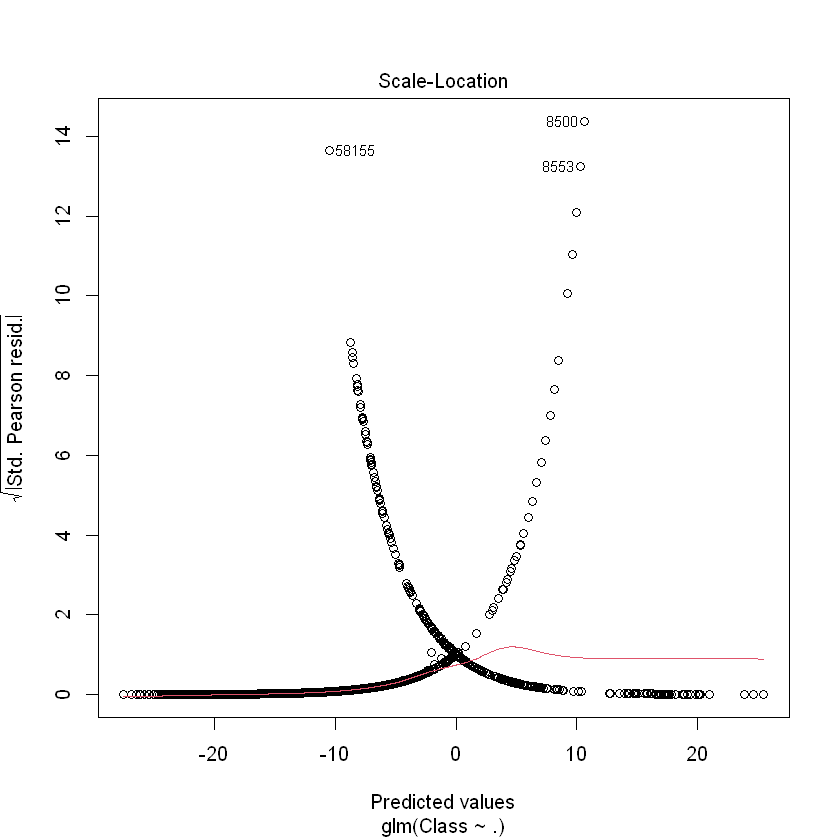

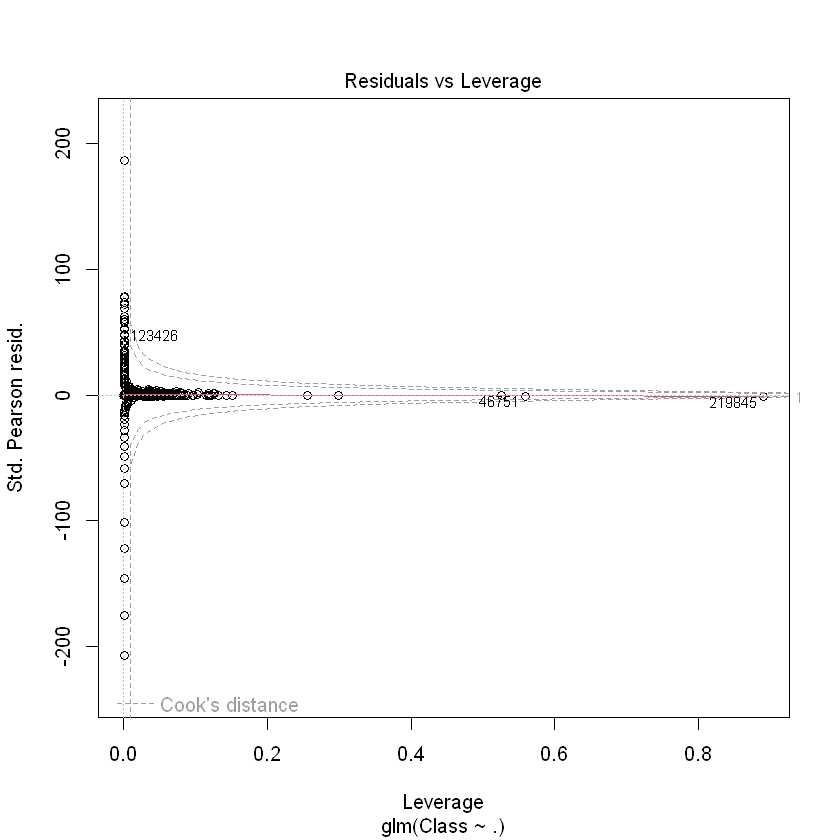

In [13]:
plot(logistic_model)

### Decision Tree

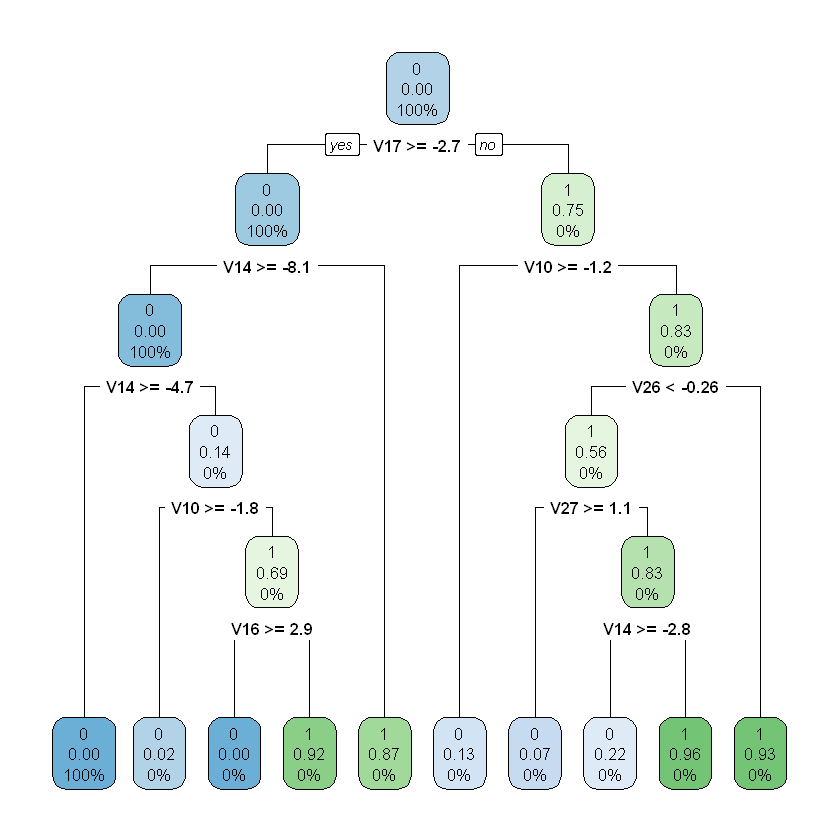

In [14]:
library(rpart)
library(rpart.plot)
decision_tree <- rpart(Class~., train_data, method="class")
predicted_val <- predict(decision_tree, test_data, type="class")
probability <- predict(decision_tree, test_data, type="prob")
rpart.plot(decision_tree)

### Artificial Nerual Network


载入程辑包：'neuralnet'


The following object is masked from 'package:dplyr':

    compute




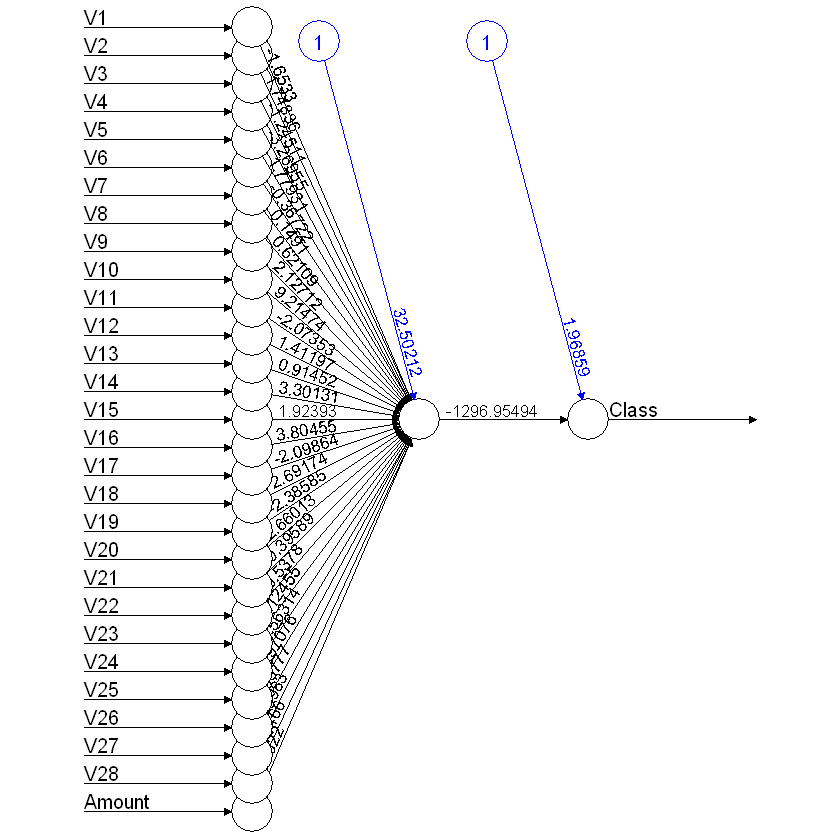

In [15]:
library(neuralnet)
my_ANN_model <- neuralnet(Class~., train_data, linear.output=FALSE)
plot(my_ANN_model, rep="best")
## solve plot not showing up problem by adding rep param, plus it saves so much time
## https://github.com/rstudio/rmarkdown/issues/856

# predANN <- neuralnet::compute(ANN, test_data)
# resultANN <- predANN$net.result
# resultANN <- ifelse(resultANN>0.5, 1, 0)


### Gradient Boosting

In [16]:
library(gbm)
system.time(
    gbm_model <- gbm(Class~.,
                    distribution="bernoulli",
                    data=rbind(train_data, test_data),
                    n.trees=500,
                    interaction.depth=3,
                    n.minobsinnode=100,
                    shrinkage=0.01,
                    bag.fraction=0.5,
                    train.fraction=nrow(train_data) / (nrow(train_data) + nrow(test_data))))

Loaded gbm 2.1.8.1



  用户   系统   流逝 
281.06   0.28 281.60 

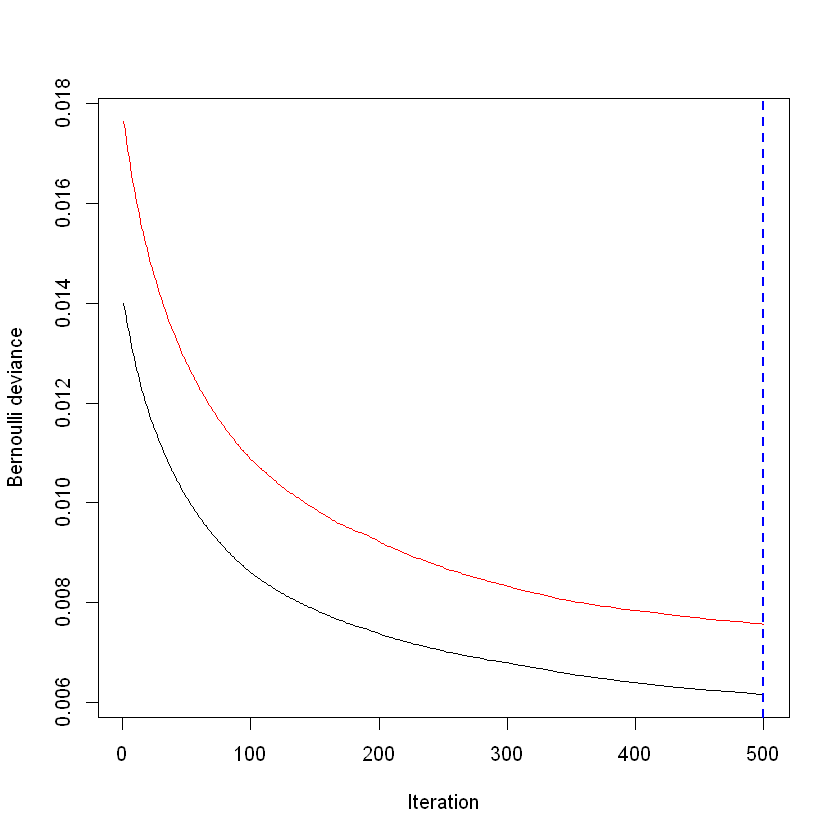

ERROR: Error in roc(test_data$Class, gbm_test, plot = TRUE, col = "red"): 没有"roc"这个函数


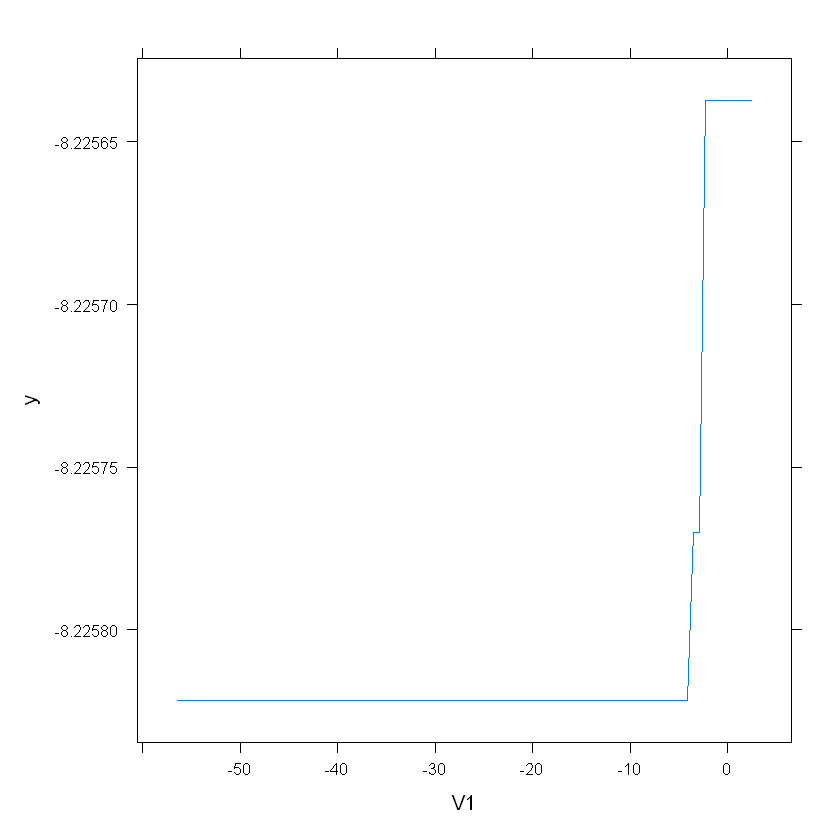

In [17]:
gbm.iter <- gbm.perf(gbm_model, method="test")
model.influence <- relative.influence(gbm_model, n.trees=gbm.iter, sort.=TRUE)
plot(gbm_model)
gbm_test <- predict(gbm_model, newdata=test_data, n.trees=gbm.iter)
gbm_auc <- roc(test_data$Class, gbm_test, plot=TRUE, col="red")
print(gbm_auc)